In [1]:
import os
import pandas
import subprocess
import numpy
import time

In [2]:
def netflow2dataframe(file_input, method):

    temp_file_path = "/tmp/nflow.csv"

    #Convert nflow to csv
    p = subprocess.Popen(["nfdump -r " + file_input + " -o " + method + " -o csv > " + temp_file_path], shell=True, stdout=subprocess.PIPE)
    file_info, error = p.communicate()
    p.wait()
    
    columns = [ 'start_time', #ts,
                'end_time',# te,
                'time duration',#td,
                'src_ip',#sa,
                'dst_ip',#da,
                'src_port',#sp,
                'dst_port',#dp,
                'ip_proto',#pr,
                'tcp_flag',#flg,
                'forwarding',#fwd,
                'src_tos',#stos,
                'i_packets',#ipkt,
                'i_bytes',#ibyt,
                'o_packets',#opkt,
                'o_bytes',#obyt,
                'i_interface_num',#in,
                'o_interface_num',#out,
                'src_as',#sas,
                'dst_as',#das,
                'src_mask',#smk,
                'dst_mask',#dmk,
                'dst_tos',#dtos,
                'direction',#dir,
                'next_hop_ip',#nh,
                'bgt_next_hop_ip',#enhb,
                'src_vlan_label',#svln,
                'dst_vlan_label',#dvln,
                'i_src_mac',#ismc,
                'o_dst_mac',#odmc,
                'i_dst_mac',#idmc,
                'o_src_mac',#osmc,
                'mpls1',
                'mpls2',
                'mpls3',
                'mpls4',
                'mpls5',
                'mpls6',
                'mpls7',
                'mpls8',
                'mpls9',
                'mpls10',
                'cl',
                'sl',
                'al',
                'ra',
                'eng',
                'exid',
                'tr']
    try:
        df = pandas.read_csv(temp_file_path)
    except Exception:
        print Exception
        print("Pandas can't read the csv flow file. Exiting.")
        return

    summary = df.iloc[[len(df)-1]]
    total_flows = summary.iloc[0]['ts']
    total_bytes = summary.iloc[0]['te'] #raw_size
    total_packets = summary.iloc[0]['td']
    summary = [total_flows, total_bytes, total_packets]
    
    df.dropna(inplace=True,how='any')
    
    df['dp'] = df['dp'].astype('int32')
    df['ibyt'] = df['ibyt'].astype('int32')
    df['sp'] = df['sp'].astype('int32')
    
    df.columns = columns

# #No need to remove. Will be used later.
#     try:
#         subprocess.call("rm " + temp_file_path, shell=True) #Unsafe
#     except:
#         pass
    
    return (total_flows, total_packets)

In [3]:
def get_statistics(file_input):
    extended_start = time.time()
    netflow2dataframe(file_input, "extended")
    extended_duration = time.time() - extended_start
    long_start = time.time()
    (total_flows, total_packets) = netflow2dataframe(file_input, "long")
    long_duration = time.time() - long_start
    return [file_input, os.path.getsize(file_input), total_flows, total_packets, extended_duration, long_duration]

In [11]:
output = []
directory = "/mnt/c/Users/Koen/Documents/DDoSDB/netflowdata"
for subdir in os.listdir(directory):
    for filename in os.listdir(os.path.join(directory, subdir)):
        if filename.startswith("nfcapd"):
            fullfile = os.path.join(directory, subdir, filename)
            print fullfile
            output.append(get_statistics(fullfile))
        
print output
print "DONE"

/mnt/c/Users/Koen/Documents/DDoSDB/netflowdata/1-loic-10s-9threads.pcap/nfcapd.201510091335
/mnt/c/Users/Koen/Documents/DDoSDB/netflowdata/1-loic-10s-defaults.pcap/nfcapd.201510091330
/mnt/c/Users/Koen/Documents/DDoSDB/netflowdata/1-loic-10s-network-3-4.pcap/nfcapd.201510141140
/mnt/c/Users/Koen/Documents/DDoSDB/netflowdata/1-loic-10s-network-3-4.pcap/nfcapd.201510141145
/mnt/c/Users/Koen/Documents/DDoSDB/netflowdata/1-loic-10s-network-3-5.pcap/nfcapd.201510141145
/mnt/c/Users/Koen/Documents/DDoSDB/netflowdata/1-loic-10s.pcap/nfcapd.201509291610
/mnt/c/Users/Koen/Documents/DDoSDB/netflowdata/1-loic-30s-tcp.pcap/nfcapd.201510091310
/mnt/c/Users/Koen/Documents/DDoSDB/netflowdata/10-Torshammer-10s.pcap/nfcapd.201509301720
/mnt/c/Users/Koen/Documents/DDoSDB/netflowdata/10-TorsHammer-120s-1.pcap/nfcapd.201510141525
/mnt/c/Users/Koen/Documents/DDoSDB/netflowdata/10-TorsHammer-120s-1.pcap/nfcapd.201510141530
/mnt/c/Users/Koen/Documents/DDoSDB/netflowdata/10-torshammer-5m.pcap/nfcapd.201510091

/mnt/c/Users/Koen/Documents/DDoSDB/netflowdata/ANON-GHPPOST-S-01_2014-12-29_10_01_26.pcap/nfcapd.201412291105
/mnt/c/Users/Koen/Documents/DDoSDB/netflowdata/ANON-GHPPOST-S-02_2014-12-29_11_28_49.pcap/nfcapd.201412291225
/mnt/c/Users/Koen/Documents/DDoSDB/netflowdata/ANON-GHPPOST-S-02_2014-12-29_11_28_49.pcap/nfcapd.201412291230
/mnt/c/Users/Koen/Documents/DDoSDB/netflowdata/ANON-NTP-S-01_2014-12-22_15_23_41.pcap/nfcapd.201412221620
/mnt/c/Users/Koen/Documents/DDoSDB/netflowdata/ANON-NTP-S-01_2014-12-22_15_23_41.pcap/nfcapd.201412221625
/mnt/c/Users/Koen/Documents/DDoSDB/netflowdata/ANON-NTP-S-02_2014-12-23_23_01_20.pcap/nfcapd.201412240000
/mnt/c/Users/Koen/Documents/DDoSDB/netflowdata/ANON-NTP-S-02_2014-12-23_23_01_20.pcap/nfcapd.201412240005
/mnt/c/Users/Koen/Documents/DDoSDB/netflowdata/ANON-SLOW-S-01_2014-12-29_09_27_17.pcap/nfcapd.201412291025
/mnt/c/Users/Koen/Documents/DDoSDB/netflowdata/ANON-SLOW-S-01_2014-12-29_09_27_17.pcap/nfcapd.201412291030
/mnt/c/Users/Koen/Documents/DDoS

/mnt/c/Users/Koen/Documents/DDoSDB/netflowdata/DEST-SSYN-S-01_2014-12-25_12_57_55.pcap/nfcapd.201412251400
/mnt/c/Users/Koen/Documents/DDoSDB/netflowdata/DEST-SSYN-S-02_2014-12-29_15_20_57.pcap/nfcapd.201412291620
/mnt/c/Users/Koen/Documents/DDoSDB/netflowdata/DEST-SSYN-S-02_2014-12-29_15_20_57.pcap/nfcapd.201412291625
/mnt/c/Users/Koen/Documents/DDoSDB/netflowdata/DEST-SUDP-S-01_2014-12-29_09_39_49.pcap/nfcapd.201412291035
/mnt/c/Users/Koen/Documents/DDoSDB/netflowdata/DEST-SUDP-S-01_2014-12-29_09_39_49.pcap/nfcapd.201412291040
/mnt/c/Users/Koen/Documents/DDoSDB/netflowdata/DEST-SUDP-S-02_2014-12-29_11_22_32.pcap/nfcapd.201412291220
/mnt/c/Users/Koen/Documents/DDoSDB/netflowdata/DEST-SUDP-S-02_2014-12-29_11_22_32.pcap/nfcapd.201412291225
/mnt/c/Users/Koen/Documents/DDoSDB/netflowdata/DEST-UDP-S-01_2014-12-29_09_53_22.pcap/nfcapd.201412291050
/mnt/c/Users/Koen/Documents/DDoSDB/netflowdata/DEST-UDP-S-01_2014-12-29_09_53_22.pcap/nfcapd.201412291055
/mnt/c/Users/Koen/Documents/DDoSDB/netf

In [19]:
import json
import os

f = open("/mnt/c/Users/Koen/Documents/DDoSDB/outcome.json", "w")

f.write(json.dumps(output))
# numpy.savetxt("/mnt/c/Users/Koen/Documents/DDoSDB/outcome.txt", output)

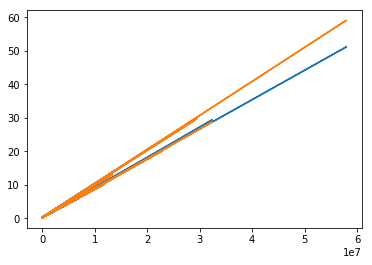

In [14]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

x_list = [x[1] for x in output]

plt.plot(x_list, [y[4] for y in output], label="Extended")
plt.plot(x_list, [y[5] for y in output], label="Long")

ValueError: x and y must have same first dimension, but have shapes (217,) and (223,)

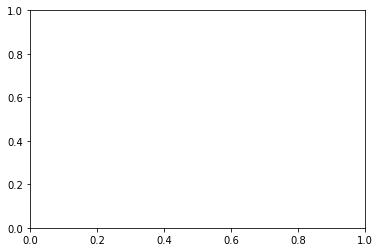

In [29]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

x_list = [int(x[2]) for x in output if x[2].isdigit()]

plt.plot(x_list, [y[4] for y in output if y[2].isdigit()], label="Extended")
plt.plot(x_list, [y[5] for y in output if y[2].isdigit()], label="Long")